## Preprocessing dan Feature Engineering

## Import Package

In [1]:
#Import library untuk data preparation dan visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings for ignore the warnings
import warnings 
warnings.filterwarnings("ignore")

# import pickle and json file for columns and model file
import pickle
import json
import joblib
import yaml
import scipy.stats as scs
import src.util as util

#Import package untuk balancing dataset
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pickle
import os

In [2]:
params_dir = "config/config.yaml"

In [3]:
def load_params(param_dir):
    with open(param_dir, 'r') as file:
        params = yaml.safe_load(file)
        
    return params

In [4]:
params = load_params(params_dir)

In [5]:
params

{'raw_dataset_dir': 'dataset/1 - raw data/',
 'train_set_path': ['dataset/2 - processed/X_train.pkl',
  'dataset/2 - processed/y_train.pkl'],
 'valid_set_path': ['dataset/2 - processed/X_valid.pkl',
  'dataset/2 - processed/y_valid.pkl'],
 'test_set_path': ['dataset/2 - processed/X_test.pkl',
  'dataset/2 - processed/y_test.pkl'],
 'train_feng_set_path': ['dataset/2 - processed/X_train_feng.pkl',
  'dataset/2 - processed/y_train_feng.pkl'],
 'valid_feng_set_path': ['dataset/2 - processed/X_valid_feng.pkl',
  'dataset/2 - processed/y_valid_feng.pkl'],
 'test_feng_set_path': ['dataset/2 - processed/X_test_feng.pkl',
  'dataset/2 - processed/y_test_feng.pkl'],
 'impute_data_train': ['dataset/2 - processed/X_train_impute.pkl',
  'dataset/2 - processed/y_test_impute.pkl'],
 'impute_data_test': ['dataset/2 - processed/X_test_impute.pkl',
  'dataset/2 - processed/y_test_impute.pkl'],
 'impute_data_valid': ['dataset/2 - processed/X_valid_impute.pkl',
  'dataset/2 - processed/y_valid_impute.pkl

In [6]:
config_data = util.load_config()

## Read Data

In [7]:
X_train = util.pickle_load(config_data["train_set_path"][0])
y_train = util.pickle_load(config_data["train_set_path"][1])

X_valid = util.pickle_load(config_data["valid_set_path"][0])
y_valid = util.pickle_load(config_data["valid_set_path"][1])

X_test = util.pickle_load(config_data["test_set_path"][0])
y_test = util.pickle_load(config_data["test_set_path"][1])

In [8]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
3144,648,Spain,Male,55,1,81370.07,1,0,1,181534.04
9939,693,Spain,Female,57,9,0.00,2,1,1,135502.77
7925,586,Spain,Female,33,7,0.00,2,1,1,168261.40
309,438,Germany,Male,31,8,78398.69,1,1,0,44937.01
9415,768,Germany,Female,43,2,129264.05,2,0,0,19150.14
...,...,...,...,...,...,...,...,...,...,...
9785,455,France,Female,27,5,155879.09,2,0,0,70774.97
7763,614,Spain,Female,36,1,44054.84,1,1,1,73329.08
5218,685,France,Male,20,4,104719.94,2,1,0,38691.34
1346,643,France,Male,30,5,94443.77,1,1,1,165614.40


In [9]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
3144,648,Spain,Male,55,1,81370.07,1,0,1,181534.04
9939,693,Spain,Female,57,9,0.00,2,1,1,135502.77
7925,586,Spain,Female,33,7,0.00,2,1,1,168261.40
309,438,Germany,Male,31,8,78398.69,1,1,0,44937.01
9415,768,Germany,Female,43,2,129264.05,2,0,0,19150.14
...,...,...,...,...,...,...,...,...,...,...
9785,455,France,Female,27,5,155879.09,2,0,0,70774.97
7763,614,Spain,Female,36,1,44054.84,1,1,1,73329.08
5218,685,France,Male,20,4,104719.94,2,1,0,38691.34
1346,643,France,Male,30,5,94443.77,1,1,1,165614.40


In [10]:
#Menyatukan data X_train dan y_train untuk dilakukan preprocessing dan Feature Engineering menjadi satu set
dataset = pd.concat([X_train, y_train], axis = 1)

#Menyatukan data X_valid dan y_valid untuk dilakukan preprocessing dan Feature Engineering menjadi satu set
valid_set = pd.concat([X_valid, y_valid], axis = 1)

#Menyatukan data X_test dan y_test untuk dilakukan preprocessing dan Feature Engineering menjadi satu set
test_set = pd.concat([X_test, y_test], axis = 1)

## Handling Missing Value

In [11]:
from sklearn.impute import SimpleImputer

def imputeData(data, numerical_columns_mean, numerical_columns_median, categorical_columns):
    """
    Fungsi untuk melakukan imputasi data numerik dan kategorikal
    :param data: <pandas dataframe> sample data input
    :param numerical_columns_mean: <list> list kolom numerik data yang akan diimputasi dengan mean
    :param numerical_columns_median: <list> list kolom numerik data yang akan diimputasi dengan median
    :param categorical_columns: <list> list kolom kategorikal data
    :return numerical_data_imputed: <pandas dataframe> data numerik imputed
    :return categorical_data_imputed: <pandas dataframe> data kategorikal imputed
    """
    # Imputasi kolom numerik dengan mean
    numerical_data_mean = data[numerical_columns_mean]
    imputer_numerical_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    imputer_numerical_mean.fit(numerical_data_mean)
    imputed_data_mean = imputer_numerical_mean.transform(numerical_data_mean)
    numerical_data_imputed_mean = pd.DataFrame(imputed_data_mean, columns=numerical_columns_mean, index=numerical_data_mean.index)

    # Imputasi kolom numerik dengan median
    numerical_data_median = data[numerical_columns_median]
    imputer_numerical_median = SimpleImputer(missing_values=np.nan, strategy='median')
    imputer_numerical_median.fit(numerical_data_median)
    imputed_data_median = imputer_numerical_median.transform(numerical_data_median)
    numerical_data_imputed_median = pd.DataFrame(imputed_data_median, columns=numerical_columns_median, index=numerical_data_median.index)

    # Gabungkan kedua data numerik yang telah diimputasi
    numerical_data_imputed = pd.concat([numerical_data_imputed_mean, numerical_data_imputed_median], axis=1)

    # Seleksi data kategorikal
    categorical_data = data[categorical_columns]

    # Imputasi dengan menggunakan modus
    mode = categorical_data.mode().iloc[0]

    # Lakukan imputasi untuk data kategorikal
    categorical_data_imputed = categorical_data.fillna(mode)

    # Gabungkan data numerik dan kategorikal yang telah diimputasi
    data_imputed = pd.concat([numerical_data_imputed, categorical_data_imputed], axis=1)

    return data_imputed

## Parameter Imputasi 

In [12]:
#Imputasi Data
numerical_column = ["Age"]
numerical_column_mean = ["CreditScore", "Balance", "EstimatedSalary"]
set_numerik = numerical_column + numerical_column_mean
dataset_column = list(X_train.columns)
categorical_column = list(set(dataset_column).difference(set(set_numerik)))

## Imputasi Data Train

In [13]:
X_train_impute = imputeData(data = X_train, 
                            numerical_columns_mean = numerical_column_mean, 
                            numerical_columns_median = numerical_column, 
                            categorical_columns = categorical_column)

In [14]:
X_train_impute

,CreditScore,Balance,EstimatedSalary,Age,IsActiveMember,Geography,Gender,Tenure,HasCrCard,NumOfProducts
3144,648.0,81370.07,181534.04,55.0,1,Spain,Male,1,0,1
9939,693.0,0.00,135502.77,57.0,1,Spain,Female,9,1,2
7925,586.0,0.00,168261.40,33.0,1,Spain,Female,7,1,2
309,438.0,78398.69,44937.01,31.0,0,Germany,Male,8,1,1
9415,768.0,129264.05,19150.14,43.0,0,Germany,Female,2,0,2
...,...,...,...,...,...,...,...,...,...,...
9785,455.0,155879.09,70774.97,27.0,0,France,Female,5,0,2
7763,614.0,44054.84,73329.08,36.0,1,Spain,Female,1,1,1
5218,685.0,104719.94,38691.34,20.0,0,France,Male,4,1,2
1346,643.0,94443.77,165614.40,30.0,1,France,Male,5,1,1


## Imputasi Data Valid

In [15]:
X_valid_impute = imputeData(data = X_valid, 
                            numerical_columns_mean = numerical_column_mean, 
                            numerical_columns_median = numerical_column, 
                            categorical_columns = categorical_column)

In [16]:
X_valid_impute

,CreditScore,Balance,EstimatedSalary,Age,IsActiveMember,Geography,Gender,Tenure,HasCrCard,NumOfProducts
9372,677.0,78133.15,174225.88,30.0,1,France,Male,1,0,1
4916,539.0,62052.28,59755.14,39.0,1,Spain,Female,6,0,1
1778,657.0,95858.37,68255.88,41.0,1,France,Female,5,1,1
267,651.0,0.00,13898.31,36.0,0,France,Male,7,1,2
1300,538.0,134752.08,162511.55,37.0,0,France,Male,1,1,1
...,...,...,...,...,...,...,...,...,...,...
6707,607.0,105103.33,104721.50,39.0,0,Germany,Female,8,1,1
4085,520.0,134007.90,193209.11,34.0,1,France,Male,4,1,1
1161,755.0,104817.41,126013.58,41.0,0,France,Male,6,1,1
6219,636.0,115137.26,52484.01,37.0,0,Spain,Male,1,1,1


## Imputasi Data Test

In [17]:
X_test_impute = imputeData(data = X_test, 
                           numerical_columns_mean = numerical_column_mean, 
                           numerical_columns_median = numerical_column, 
                           categorical_columns = categorical_column)

In [18]:
X_test_impute

,CreditScore,Balance,EstimatedSalary,Age,IsActiveMember,Geography,Gender,Tenure,HasCrCard,NumOfProducts
2129,702.0,100054.77,109496.45,34.0,0,France,Male,4,1,1
7419,748.0,103499.09,38153.19,40.0,0,Germany,Female,3,0,2
724,694.0,97530.25,117140.41,36.0,1,France,Male,3,1,1
5592,576.0,0.00,72306.07,19.0,0,Spain,Male,6,0,2
5333,717.0,99106.73,194467.23,33.0,0,Spain,Male,1,0,1
...,...,...,...,...,...,...,...,...,...,...
5829,559.0,145303.52,103560.98,32.0,0,France,Male,9,1,1
6709,850.0,127120.62,118929.64,66.0,1,Germany,Female,0,0,1
5148,731.0,0.00,141180.66,70.0,1,Spain,Male,3,1,2
5244,672.0,0.00,64515.50,43.0,1,Spain,Male,5,1,2


In [19]:
util.pickle_dump(X_train_impute, config_data["impute_data_train"][0])

In [20]:
util.pickle_dump(X_test_impute, config_data["impute_data_test"][0])

In [21]:
util.pickle_dump(X_valid_impute, config_data["impute_data_valid"][0])

## Get Dummies

In [22]:
def get_dummies(train_df, input_df):
    # Menggabungkan data train dan input menjadi satu DataFrame
    combined_df = pd.concat([train_df, input_df])
    
    # Mengubah variabel kategorikal menjadi variabel dummy
    dummies_df = pd.get_dummies(combined_df, columns=train_df.select_dtypes(include='object').columns)
    
    # Memisahkan kembali data train dan input
    train_dummies = dummies_df[:train_df.shape[0]]
    input_dummies = dummies_df[train_df.shape[0]:]
    
    return train_dummies, input_dummies

In [23]:
dataset_ohe, valid_set = get_dummies(X_train_impute, X_valid_impute)

In [24]:
dataset, test_set = get_dummies(X_train_impute, X_test_impute)

In [25]:
dataset

,CreditScore,Balance,EstimatedSalary,Age,IsActiveMember,Tenure,HasCrCard,NumOfProducts,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
3144,648.0,81370.07,181534.04,55.0,1,1,0,1,0,0,1,0,1
9939,693.0,0.00,135502.77,57.0,1,9,1,2,0,0,1,1,0
7925,586.0,0.00,168261.40,33.0,1,7,1,2,0,0,1,1,0
309,438.0,78398.69,44937.01,31.0,0,8,1,1,0,1,0,0,1
9415,768.0,129264.05,19150.14,43.0,0,2,0,2,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,455.0,155879.09,70774.97,27.0,0,5,0,2,1,0,0,1,0
7763,614.0,44054.84,73329.08,36.0,1,1,1,1,0,0,1,1,0
5218,685.0,104719.94,38691.34,20.0,0,4,1,2,1,0,0,0,1
1346,643.0,94443.77,165614.40,30.0,1,5,1,1,1,0,0,0,1


In [26]:
test_set

,CreditScore,Balance,EstimatedSalary,Age,IsActiveMember,Tenure,HasCrCard,NumOfProducts,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2129,702.0,100054.77,109496.45,34.0,0,4,1,1,1,0,0,0,1
7419,748.0,103499.09,38153.19,40.0,0,3,0,2,0,1,0,1,0
724,694.0,97530.25,117140.41,36.0,1,3,1,1,1,0,0,0,1
5592,576.0,0.00,72306.07,19.0,0,6,0,2,0,0,1,0,1
5333,717.0,99106.73,194467.23,33.0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5829,559.0,145303.52,103560.98,32.0,0,9,1,1,1,0,0,0,1
6709,850.0,127120.62,118929.64,66.0,1,0,0,1,0,1,0,1,0
5148,731.0,0.00,141180.66,70.0,1,3,1,2,0,0,1,0,1
5244,672.0,0.00,64515.50,43.0,1,5,1,2,0,0,1,0,1


## Balancing Data

In [27]:
def sm_fit_resample(set_data: pd.DataFrame) -> pd.DataFrame:
    # Create copy of set data
    set_data = set_data.copy()

    # Create sampling object
    sm = SMOTE(random_state = 112)

    # Balancing set data
    X_sm, y_sm = sm.fit_resample(
        set_data.drop("Exited", axis = 1),
        set_data.Exited
    )

    # Concatenate balanced data
    set_data_sm = pd.concat(
        [X_sm, y_sm],
        axis = 1
    )

    # Return balanced data
    return set_data_sm

In [28]:
dataset = pd.concat([dataset, y_train],axis = 1)

In [29]:
dataset_smote = sm_fit_resample(dataset)

In [30]:
dataset_smote

,CreditScore,Balance,EstimatedSalary,Age,IsActiveMember,Tenure,HasCrCard,NumOfProducts,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,648.000000,81370.070000,181534.040000,55.000000,1,1,0,1,0,0,1,0,1,0
1,693.000000,0.000000,135502.770000,57.000000,1,9,1,2,0,0,1,1,0,0
2,586.000000,0.000000,168261.400000,33.000000,1,7,1,2,0,0,1,1,0,0
3,438.000000,78398.690000,44937.010000,31.000000,0,8,1,1,0,1,0,0,1,0
4,768.000000,129264.050000,19150.140000,43.000000,0,2,0,2,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11131,817.562478,129643.859177,63765.756782,49.720834,0,8,1,1,0,0,0,0,1,1
11132,658.211243,75808.359363,129822.685057,40.208120,0,7,1,2,1,0,0,0,0,1
11133,614.754055,101703.942718,34252.210223,46.783830,0,1,0,1,0,0,0,0,0,1
11134,603.946424,0.000000,50733.370097,37.716515,0,3,1,1,0,0,0,0,0,1


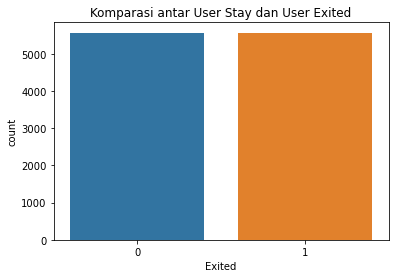

In [31]:
sns.countplot(dataset_smote["Exited"]).set(title='Komparasi antar User Stay dan User Exited')
plt.savefig('Komparasi_stay_exited_smote.png')
plt.show()

## Standart Scaler

In [100]:
columns_to_scale = ["CreditScore", "Age", "Tenure", "EstimatedSalary", "Balance"]

def fit_scaler(train_data):
    scaler = StandardScaler()
    scaler.fit(train_data.loc[:, columns_to_scale])
    # save scaler
    with open('model/5 - Model Final/scaler.pkl', 'wb') as f:
        pickle.dump(scaler, f)
    return scaler

def load_scaler(folder_path):
    # load scaler
    file_path = os.path.join(folder_path, 'scaler.pkl')
    with open(file_path, 'rb') as f:
        scaler = pickle.load(f)
    return scaler

def transform_data(data, scaler):
    scaled_data = scaler.transform(data.loc[:, columns_to_scale])
    data.loc[:, columns_to_scale] = scaled_data
    return data

In [101]:
scaler = fit_scaler(dataset_smote)

In [102]:
scaling = load_scaler('model/5 - Model Final/')

In [103]:
dataset_clean = transform_data(dataset_smote, scaling)
X_valid_clean = transform_data(valid_set, scaling)
X_test_clean = transform_data(test_set, scaling)

In [104]:
dataset_clean

,CreditScore,Balance,EstimatedSalary,Age,HasCrCard,IsActiveMember,Tenure,NumOfProducts,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,0.008815,-0.006769,1.416365,1.373814,0,1,-1.405065,1,0,0,1,0,1,0
1,0.499957,-1.328749,0.613784,1.570781,1,1,1.525871,2,0,0,1,1,0,0
2,-0.667869,-1.328749,1.184949,-0.792821,1,1,0.793137,2,0,0,1,1,0,0
3,-2.283179,-0.055043,-0.965283,-0.989788,1,0,1.159504,1,0,1,0,0,1,0
4,1.318526,0.771342,-1.414892,0.192013,0,0,-1.038698,2,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11131,1.859464,0.777512,-0.636993,0.853904,1,0,1.159504,1,0,0,0,0,1,1
11132,0.120264,-0.097127,0.514748,-0.082941,1,0,0.793137,2,1,0,0,0,0,1
11133,-0.354039,0.323586,-1.151578,0.564658,0,0,-1.405065,1,0,0,0,0,0,1
11134,-0.471997,-1.328749,-0.864220,-0.328323,1,0,-0.672331,1,0,0,0,0,0,1


In [105]:
X_valid_clean

,CreditScore,Balance,EstimatedSalary,Age,HasCrCard,IsActiveMember,Tenure,NumOfProducts,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2129,0.598185,0.296793,0.160349,-0.694338,1,0,-0.305964,1,1,0,0,0,1
7419,1.100241,0.352751,-1.083562,-0.103437,0,0,-0.672331,2,0,1,0,1,0
724,0.510871,0.255778,0.293625,-0.497371,1,1,-0.672331,1,1,0,0,0,1
5592,-0.777011,-1.328749,-0.488087,-2.171589,0,0,0.426770,2,0,0,1,0,1
5333,0.761899,0.281390,1.641863,-0.792821,0,0,-1.405065,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5829,-0.962554,1.031927,0.056860,-0.891304,1,0,1.525871,1,1,0,0,0,1
6709,2.213495,0.736519,0.324822,2.457131,0,1,-1.771432,1,0,1,0,1,0
5148,0.914699,-1.328749,0.712781,2.851065,1,1,-0.672331,2,0,0,1,0,1
5244,0.270758,-1.328749,-0.623920,0.192013,1,1,0.060403,2,0,0,1,0,1


In [106]:
X_test_clean

,CreditScore,Balance,EstimatedSalary,Age,HasCrCard,IsActiveMember,Tenure,NumOfProducts,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9372,0.325329,-0.059357,1.288943,-1.088271,0,1,-1.405065,1,1,0,0,0,1
4916,-1.180839,-0.320615,-0.706920,-0.201921,0,1,0.426770,1,0,0,1,1,0
1778,0.107044,0.228616,-0.558705,-0.004954,1,1,0.060403,1,1,0,0,1,0
267,0.041558,-1.328749,-1.506460,-0.497371,1,0,0.793137,2,1,0,0,0,1
1300,-1.191753,0.860503,1.084697,-0.398887,1,0,-1.405065,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6707,-0.438669,0.378814,0.077094,-0.201921,1,0,1.159504,1,0,1,0,1,0
4085,-1.388210,0.848413,1.619927,-0.694338,1,1,-0.305964,1,1,0,0,0,1
1161,1.176641,0.374169,0.448334,-0.004954,1,0,0.426770,1,1,0,0,0,1
6219,-0.122156,0.541831,-0.833696,-0.398887,1,0,-1.405065,1,0,0,1,0,1


In [107]:
X_sm_clean = dataset_clean.drop(columns = "Exited")
y_sm = dataset_clean["Exited"]

In [108]:
X_sm_clean

,CreditScore,Balance,EstimatedSalary,Age,HasCrCard,IsActiveMember,Tenure,NumOfProducts,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.008815,-0.006769,1.416365,1.373814,0,1,-1.405065,1,0,0,1,0,1
1,0.499957,-1.328749,0.613784,1.570781,1,1,1.525871,2,0,0,1,1,0
2,-0.667869,-1.328749,1.184949,-0.792821,1,1,0.793137,2,0,0,1,1,0
3,-2.283179,-0.055043,-0.965283,-0.989788,1,0,1.159504,1,0,1,0,0,1
4,1.318526,0.771342,-1.414892,0.192013,0,0,-1.038698,2,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11131,1.859464,0.777512,-0.636993,0.853904,1,0,1.159504,1,0,0,0,0,1
11132,0.120264,-0.097127,0.514748,-0.082941,1,0,0.793137,2,1,0,0,0,0
11133,-0.354039,0.323586,-1.151578,0.564658,0,0,-1.405065,1,0,0,0,0,0
11134,-0.471997,-1.328749,-0.864220,-0.328323,1,0,-0.672331,1,0,0,0,0,0


In [109]:
X_sm_clean = X_sm_clean[sorted(X_sm_clean.columns)]
X_valid_clean = X_valid_clean[sorted(X_valid_clean.columns)]
X_test_clean = X_test_clean[sorted(X_test_clean.columns)]

In [110]:
X_sm_clean

,Age,Balance,CreditScore,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,HasCrCard,IsActiveMember,NumOfProducts,Tenure
0,1.373814,-0.006769,0.008815,1.416365,0,1,0,0,1,0,1,1,-1.405065
1,1.570781,-1.328749,0.499957,0.613784,1,0,0,0,1,1,1,2,1.525871
2,-0.792821,-1.328749,-0.667869,1.184949,1,0,0,0,1,1,1,2,0.793137
3,-0.989788,-0.055043,-2.283179,-0.965283,0,1,0,1,0,1,0,1,1.159504
4,0.192013,0.771342,1.318526,-1.414892,1,0,0,1,0,0,0,2,-1.038698
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11131,0.853904,0.777512,1.859464,-0.636993,0,1,0,0,0,1,0,1,1.159504
11132,-0.082941,-0.097127,0.120264,0.514748,0,0,1,0,0,1,0,2,0.793137
11133,0.564658,0.323586,-0.354039,-1.151578,0,0,0,0,0,0,0,1,-1.405065
11134,-0.328323,-1.328749,-0.471997,-0.864220,0,0,0,0,0,1,0,1,-0.672331


In [111]:
X_valid_clean

,Age,Balance,CreditScore,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,HasCrCard,IsActiveMember,NumOfProducts,Tenure
2129,-0.694338,0.296793,0.598185,0.160349,0,1,1,0,0,1,0,1,-0.305964
7419,-0.103437,0.352751,1.100241,-1.083562,1,0,0,1,0,0,0,2,-0.672331
724,-0.497371,0.255778,0.510871,0.293625,0,1,1,0,0,1,1,1,-0.672331
5592,-2.171589,-1.328749,-0.777011,-0.488087,0,1,0,0,1,0,0,2,0.426770
5333,-0.792821,0.281390,0.761899,1.641863,0,1,0,0,1,0,0,1,-1.405065
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5829,-0.891304,1.031927,-0.962554,0.056860,0,1,1,0,0,1,0,1,1.525871
6709,2.457131,0.736519,2.213495,0.324822,1,0,0,1,0,0,1,1,-1.771432
5148,2.851065,-1.328749,0.914699,0.712781,0,1,0,0,1,1,1,2,-0.672331
5244,0.192013,-1.328749,0.270758,-0.623920,0,1,0,0,1,1,1,2,0.060403


In [112]:
X_test_clean

,Age,Balance,CreditScore,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,HasCrCard,IsActiveMember,NumOfProducts,Tenure
9372,-1.088271,-0.059357,0.325329,1.288943,0,1,1,0,0,0,1,1,-1.405065
4916,-0.201921,-0.320615,-1.180839,-0.706920,1,0,0,0,1,0,1,1,0.426770
1778,-0.004954,0.228616,0.107044,-0.558705,1,0,1,0,0,1,1,1,0.060403
267,-0.497371,-1.328749,0.041558,-1.506460,0,1,1,0,0,1,0,2,0.793137
1300,-0.398887,0.860503,-1.191753,1.084697,0,1,1,0,0,1,0,1,-1.405065
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6707,-0.201921,0.378814,-0.438669,0.077094,1,0,0,1,0,1,0,1,1.159504
4085,-0.694338,0.848413,-1.388210,1.619927,0,1,1,0,0,1,1,1,-0.305964
1161,-0.004954,0.374169,1.176641,0.448334,0,1,1,0,0,1,0,1,0.426770
6219,-0.398887,0.541831,-0.122156,-0.833696,0,1,0,0,1,1,0,1,-1.405065


## Save Data

In [113]:
util.pickle_dump(X_sm_clean, config_data["standar_scaler_sm"][0])
util.pickle_dump(y_sm, config_data["standar_scaler_sm"][1])
    
util.pickle_dump(X_test_clean, config_data["standar_scaler_test"][0])
util.pickle_dump(y_test, config_data["standar_scaler_test"][1])

util.pickle_dump(X_valid_clean, config_data["standar_scaler_valid"][0])
util.pickle_dump(y_valid, config_data["standar_scaler_valid"][1])